# Evaluating classification models and predicting quality of wine

**Importing libraries**

In [1]:
"""
https://www.kaggle.com/code/lusfernandotorres/playground-s03e05-wine-quality-prediction
https://www.kaggle.com/code/rohitshitole/wine-quality-checking-by-using-ml-model
https://www.kaggle.com/code/saadmansakib/linear-regression-from-scratch-predicting-wq
https://www.kaggle.com/code/jakubzenonkujawa/wine-quality-prediction
https://www.kaggle.com/code/themagicalmammal/winequality-eda-model-87-accuracy
https://www.kaggle.com/code/jcaliz/ps-s03e05-a-complete-eda#Submit-Predictions
https://www.kaggle.com/code/qusaybtoush1990/wine-quality#The-End-%F0%9F%98%8A%F0%9F%98%8A%F0%9F%98%8A%F0%9F%98%8A
https://www.kaggle.com/code/georgyzubkov/wine-quality-exploratory-data-analysis-ml
https://www.kaggle.com/datasets/yasserh/wine-quality-dataset
"""
import pandas as pd # Used for data manipulation and analysis
import numpy as np # mathematical operations
import seaborn as sns # data visualization
import matplotlib.pyplot as plt # data visualization
%matplotlib inline

import plotly.graph_objects as go # data visualization
from sklearn.model_selection import train_test_split, cross_val_score # data split
from sklearn.pipeline import Pipeline # data pipeline
from sklearn.preprocessing import MinMaxScaler # data normalization
from sklearn.decomposition import PCA # data dimensionality reduction
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.naive_bayes import GaussianNB # Naive Bayes algorithm
from sklearn.metrics import classification_report # model evaluation
from sklearn.model_selection import cross_val_score, KFold # model evaluation

import warnings # ignore warnings
warnings.simplefilter("ignore", UserWarning)

**Loading & Analyzing Data**

In [2]:
# reads the data
df=pd.read_csv("./WineQT.csv")

# Add a new column 'Class' based on the column values
df['Class'] = ['Low-Quality' if quality < 5 else 'Medium-Quality' if quality >= 5 and quality <= 6 else 'High-Quality' for quality in df['quality']]

In [3]:
# Analyzing the data set and checking if the Class column was added
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,Class
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,Medium-Quality
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1,Medium-Quality
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2,Medium-Quality
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3,Medium-Quality
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4,Medium-Quality
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592,Medium-Quality
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593,Medium-Quality
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594,Medium-Quality
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595,Medium-Quality


In [4]:
# Count the values in 'Class' to see the classes of quality of wine
value_counts = df['Class'].value_counts()
print(value_counts)

Medium-Quality    945
High-Quality      159
Low-Quality        39
Name: Class, dtype: int64


In [5]:
# check the data type of each column and if there are any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
 13  Class                 1143 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 125.1+ KB


In [6]:
# check the statistical summary of the data
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [7]:
# Dropping unnecessary columns
df = df.drop(columns=['Id'])

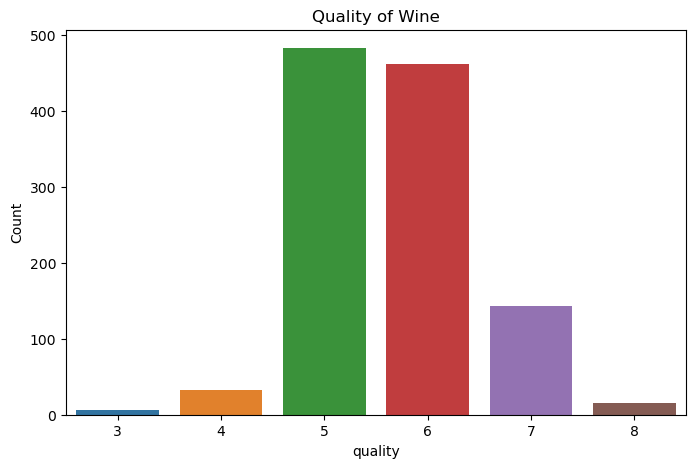

In [8]:
#Visualizing the quality of wine
plt.figure(figsize=(8,5))
sns.countplot(x='quality', data = df)
plt.title("Quality of Wine")
plt.ylabel('Count')
plt.show()

In [9]:
#Visualizing the quality of wine
fig = go.Figure(data=[go.Pie(labels=df['quality'].value_counts().index, values=df['quality'].value_counts(), hole=.3)])
fig.update_layout(legend_title_text='Quality')
fig.show()

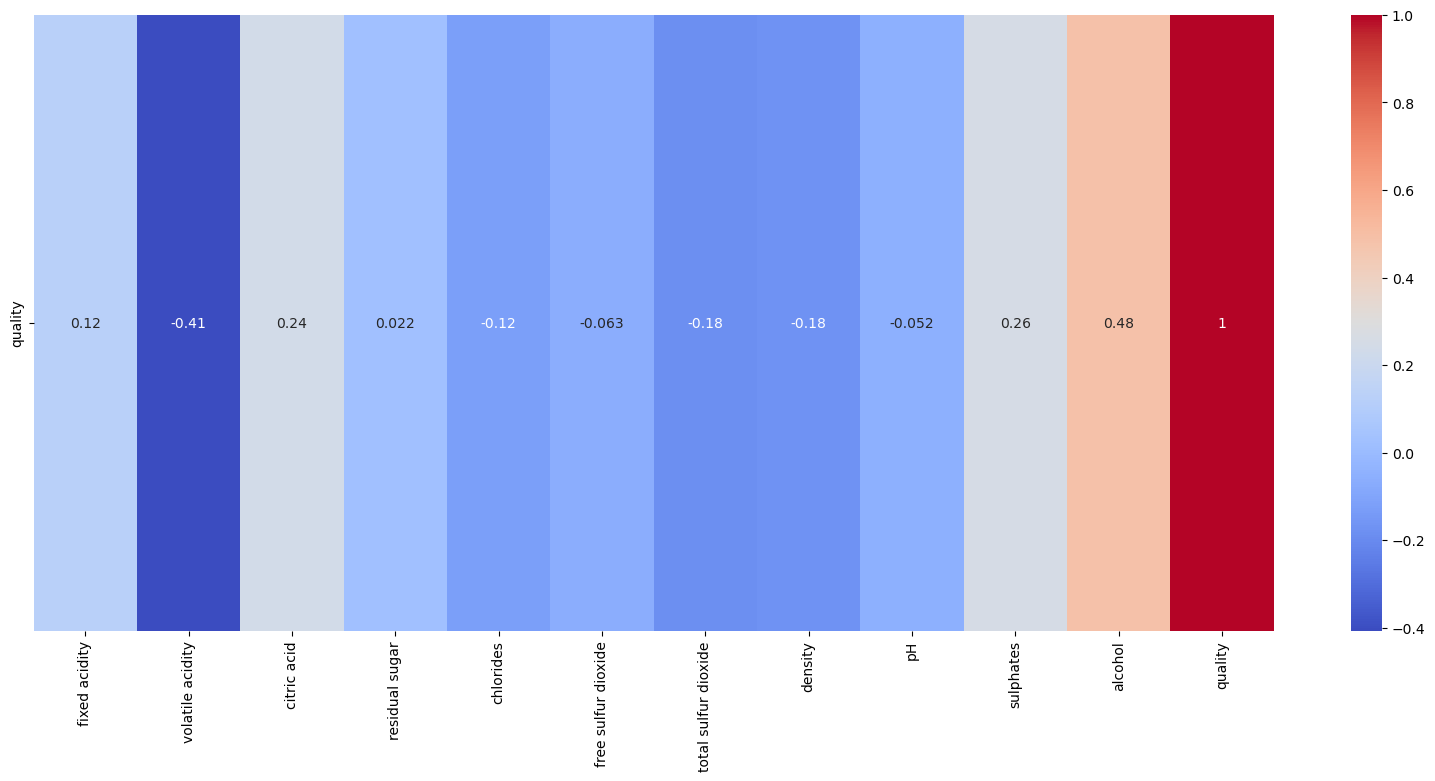

In [10]:
# Checking correlation between the features and the target
corr = df.corr()
mask = abs(corr['quality']) >= 0.5
plt.figure(figsize=(20,8))
sns.heatmap(corr[mask], annot = True, cmap = 'coolwarm')
plt.show()

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

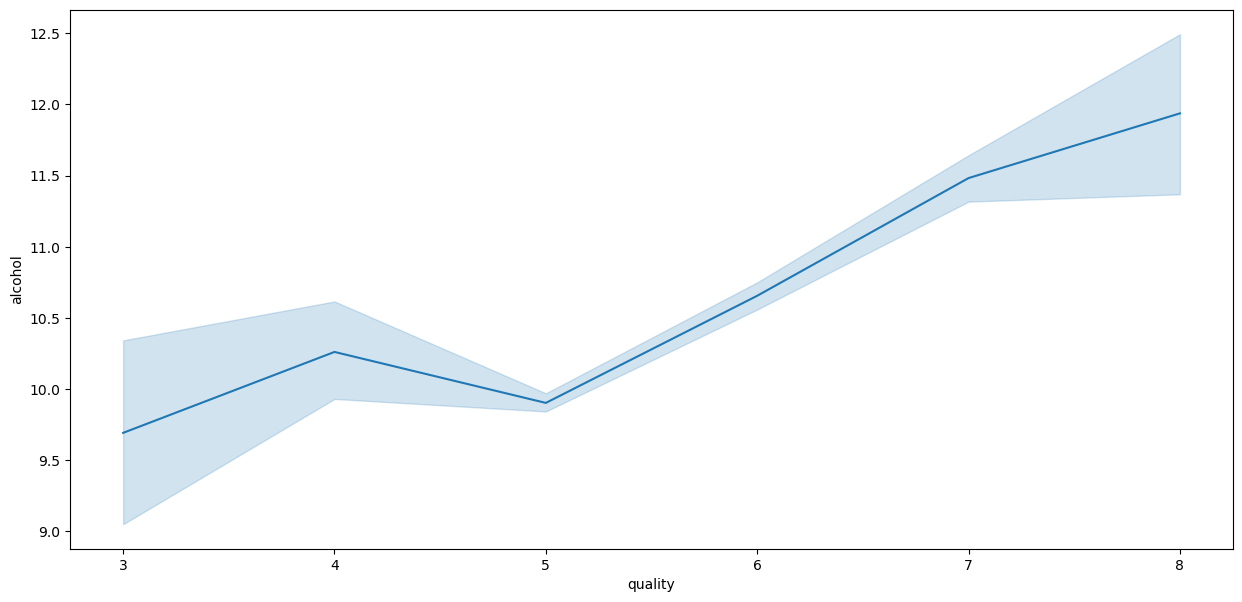

In [11]:
# Checking how increasing the target variable affects the features
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="quality",y="alcohol")

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

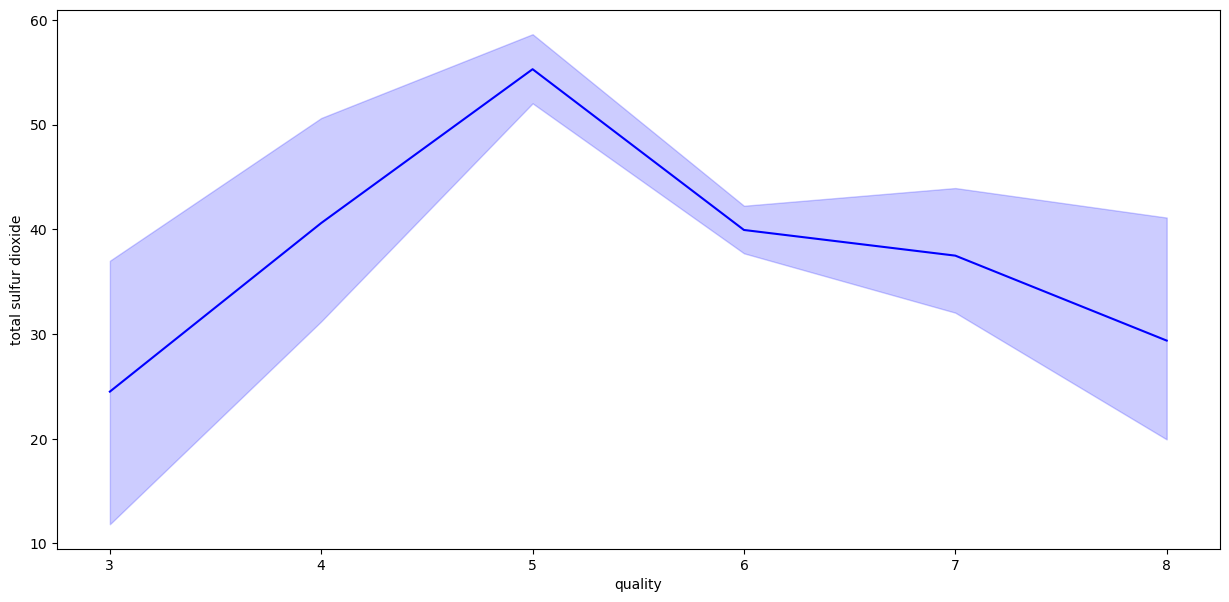

In [12]:
# Checking how increasing the target variable affects the features
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="quality",y="total sulfur dioxide",color="b")

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

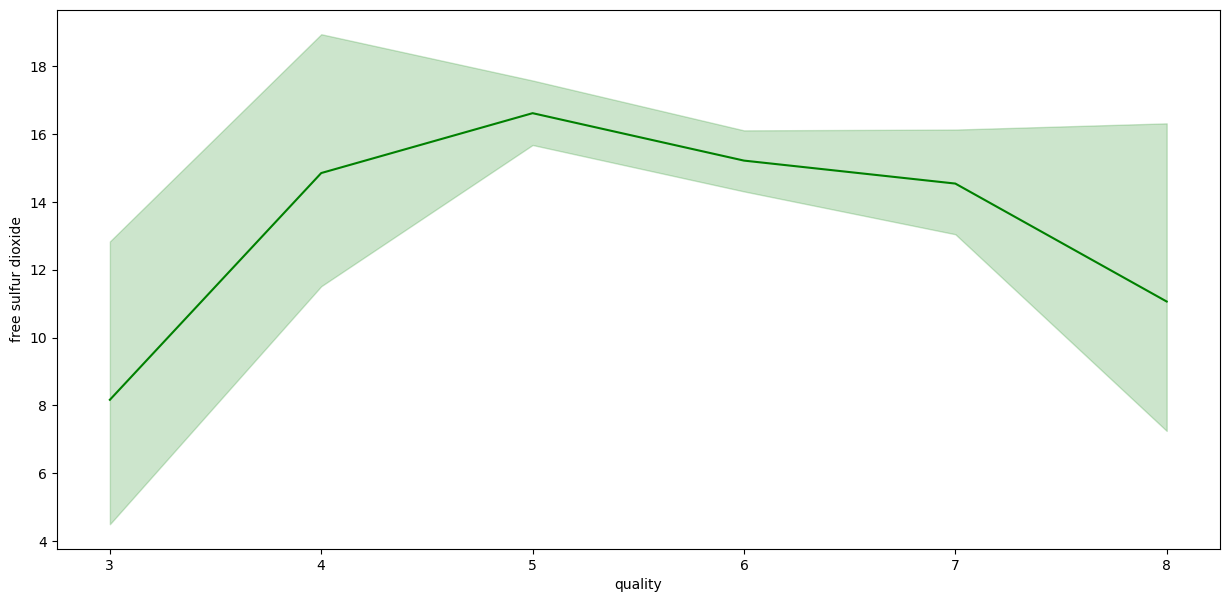

In [13]:
# Checking how increasing the target variable affects the features
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="quality",y="free sulfur dioxide",color="g")

**Splitting Feature & Target**

In [14]:
# Splitting target and predictor values from one another
X = df.drop(['quality', 'Class'], axis = 1)
y = df['quality']

In [15]:
#Splitting the data into training and testing sets, with 25% of the data for testing to balance model performance and generalization
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42, shuffle = True, stratify = y)

**Classification modeling**

In [16]:
#Naive Bayes Pipeline
NaiveBayesPipeline = Pipeline([
    ('scaler', MinMaxScaler()),            # Scale the features
    ('pca', PCA(n_components=3)),         # Apply PCA for dimensionality reduction
    ('classifier', GaussianNB())      # Apply Naive Bayes classifier
])

In [17]:
# Create a pipeline with KNN classifier
KNN_Pipeline = Pipeline([
    ('scaler', MinMaxScaler()),      # Scale the features
    ('pca', PCA(n_components=3)),    # Apply PCA for dimensionality reduction
    ('knn', KNeighborsClassifier())  # KNN classifier
])

In [18]:
Pipelines = [NaiveBayesPipeline, KNN_Pipeline] # List of pipelines

In [19]:
accuracy =0.0
classifier=0
pipeline=""

In [20]:
# Simultanelously fitting the data to the pipelines
PipelineDict = {0: 'Naive Bayes', 1: 'K_Nearest Neighbor'}

for mypipe in Pipelines:
    mypipe.fit(X_train, y_train)

**Evaluating the models**

In [21]:
# We are iterating through the pipelines and checking which model performs the best
for i,model in enumerate(Pipelines):
    print("{} Test Accuracy: {}".format(PipelineDict[i],model.score(X_test,y_test)))

Naive Bayes Test Accuracy: 0.5804195804195804
K_Nearest Neighbor Test Accuracy: 0.5909090909090909


c:\Users\storm\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [22]:
# Finding the best model
for i,model in enumerate(Pipelines):
    if model.score(X_test, y_test) > accuracy:
        accuracy=model.score(X_test, y_test)
        pipeline=model
        classifier=i
print('Classifier with best accuracy:{}'.format(PipelineDict[classifier]))

Classifier with best accuracy:K_Nearest Neighbor


c:\Users\storm\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

c:\Users\storm\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [23]:
# Cross validating our model
cv = KFold(n_splits=10)
scores = cross_val_score(KNN_Pipeline, X, y, cv=cv)

print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())

c:\Users\storm\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



Cross-validation scores: [0.50434783 0.53913043 0.37391304 0.57894737 0.57017544 0.42105263
 0.44736842 0.49122807 0.56140351 0.57894737]
Mean score: 0.506651411136537
Standard deviation: 0.06873549031663599


c:\Users\storm\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

c:\Users\storm\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

c:\U

In [24]:
# Predict from the test dataset
predictions = KNN_Pipeline.predict(X_test)

c:\Users\storm\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [25]:
# Using evaluation metrics to evaluate the model
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.25      0.12      0.17         8
           5       0.63      0.71      0.67       121
           6       0.56      0.58      0.57       116
           7       0.58      0.42      0.48        36
           8       0.00      0.00      0.00         4

    accuracy                           0.59       286
   macro avg       0.34      0.30      0.31       286
weighted avg       0.57      0.59      0.58       286



In [26]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Medium-Quality
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Medium-Quality
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Medium-Quality
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Medium-Quality
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Medium-Quality


In [27]:
# Given our own inputs for the features of the wine, we can predict the quality of the wine
X_new = np.array([ [7.4, 0.70, 0.55, 2.2, 0.095, 18, 35, 0.9956, 3.55, 0.66, 9.4]])
#Prediction of the species from the input vector
prediction = KNN_Pipeline.predict(X_new)


c:\Users\storm\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [28]:
#Given the predicted score for the quality of wine we can asscociate it with a class
if prediction <= 4:
    print("Prediction of the quality of wine: Low quality")
if prediction >= 5 and prediction <= 6:
    print("Prediction of the quality of wine: Medium quality")
else:
    print("Prediction of the quality of wine: High quality")


Prediction of the quality of wine: Medium quality


In [29]:
# Save the model
import pickle
with open('SVM.pickle', 'wb') as f:
    pickle.dump(KNN_Pipeline, f)

In [30]:
# Load the model
with open('SVM.pickle', 'rb') as f:
    model = pickle.load(f)

In [31]:
# Once the model is loaded, we can use it to predict the quality of wine
model.predict(X_new)

c:\Users\storm\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



array([6], dtype=int64)